In [1]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Import the create_engine function from sqlalchemy.
# Rest of the code...
# Create Engine
engine = create_engine("sqlite:///Resources/allattacks.sqlite")
conn = engine.connect()

In [4]:
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/allattacks.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

# Save reference to the table
Combined_attacks = Base.classes.combined_attacks
#print(Base.classes.keys())

AttributeError: combined_attacks

In [3]:
query = """SELECT * 
        FROM combined_attacks"""
df = pd.read_sql(query, conn)
df.head()

,case_number,date,year,attack_type,country,area,location,activity,name,sex,...,original_order,unnamed_22,unnamed_23,animal_type,count,latitude,longitude,details,month,day
0,2019.08.27,2019-08-27,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6452.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
1,2019.08.21,2019-08-21,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,6451.0,None,None,shark,6.0,26.122308,-80.143379,None,NaN,NaN
2,2019.08.20,2019-08-20,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,6450.0,None,None,shark,1.0,41.635587,-82.837600,None,NaN,NaN
3,2019.08.16,2019-08-16,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,6449.0,None,None,shark,174.0,29.025813,-80.927127,None,NaN,NaN
4,2019.08.11,2019-08-11,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,6448.0,None,None,shark,1.0,21.476965,-158.220908,None,NaN,NaN


In [6]:
print(df.to_json())

{"case_number":{"0":"2019.08.27","1":"2019.08.21","2":"2019.08.20","3":"2019.08.16","4":"2019.08.11","5":"2019.08.04","6":"2019.08.03.c","7":"2019.08.03.b","8":"2019.08.03.a","9":"2019.07.30","10":"2019.07.29","11":"2019.07.27.b","12":"2019.07.27.a","13":"2019.07.22","14":"2019.07.18","15":"2019.07.16","16":"2019.07.12","17":"2019.06.30","18":"2019.06.16.b","19":"2019.06.16.a","20":"2019.06.10","21":"2019.06.02","22":"2019.05.25.b","23":"2019.05.20","24":"2019.05.14.b","25":"2019.05.07","26":"2019.05.01","27":"2019.04.23","28":"2019.04.21","29":"2019.04.12","30":"2019.04.06.b","31":"2019.04.06.a","32":"2019.03.26","33":"2019.03.22","34":"2019.03.16","35":"2019.03.12","36":"2019.03.05.b","37":"2019.02.04.b","38":"2019.02.02.a","39":"2019.01.08","40":"2018.11.24","41":"2018.10.23.c","42":"2018.10.23.b","43":"2018.10.23.a","44":"2018.10.11","45":"2018.09.29","46":"2018.08.27","47":"2018.09.20.b","48":"2018.09.15","49":"2018.09.08.b","50":"2018.09.08.a","51":"2018.09.07","52":"2018.08.24",

In [4]:
df.animal_type.unique()

array(['shark', 'bear'], dtype=object)

# Q1. Whether Attacks have increased/decreased over time?

## Shark Attacks

In [5]:
shark_df = df.loc[df['animal_type'] == 'shark']
shark_df.isna().sum()

case_number                  1
date                       211
year                       135
attack_type                  0
country                      0
area                         1
location                     0
activity                   128
name                        30
sex                          0
age                        729
injury                       5
fatal_(y/n)                197
time                       790
species                    887
investigator_or_source       6
pdf                          0
href_formula                 0
href                         0
case_number.1                0
case_number.2                0
original_order               0
unnamed:_22               2192
unnamed:_23               2192
animal_type                  0
count                        0
latitude                     0
longitude                    0
details                   2193
month                     2193
day                       2193
dtype: int64

In [6]:
shark_years = shark_df['year'].dropna()
shark_years = shark_years.astype(int)
shark_attacks_count = shark_years.value_counts().sort_index()
shark_attacks_count

year
1900     6
1901     1
1902     3
1903     2
1904     2
        ..
2015    72
2016    63
2017    61
2018    42
2019    40
Name: count, Length: 117, dtype: int64

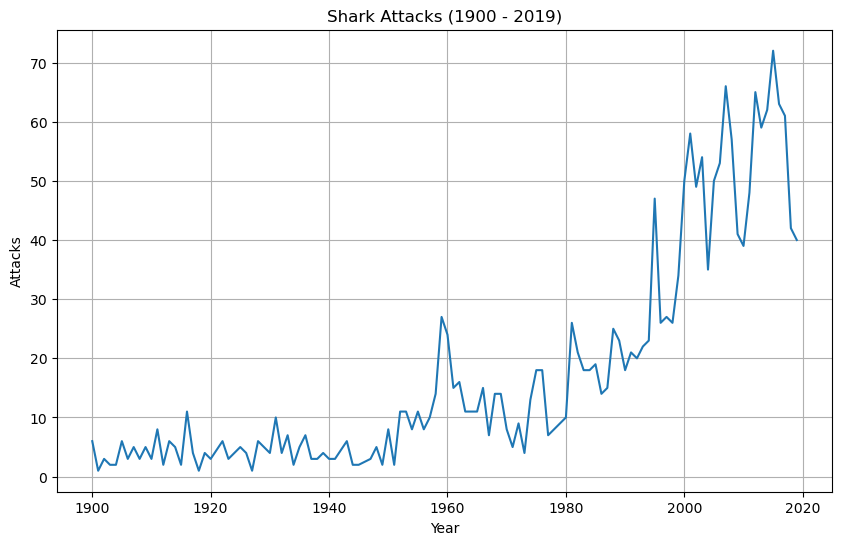

In [7]:
plt.figure(figsize = (10,6))
shark_attacks_count.plot(title = 'Shark Attacks (1900 - 2019)', xlabel = 'Year', ylabel = 'Attacks')

plt.grid()

## Bear Attacks

In [8]:
bear_df = df.loc[df['animal_type'] == 'bear']
bear_df.isna().sum()

case_number               136
date                        0
year                        0
attack_type               136
country                   136
area                      136
location                    0
activity                  136
name                        0
sex                         0
age                         3
injury                    136
fatal_(y/n)               136
time                      136
species                     0
investigator_or_source    136
pdf                       136
href_formula              136
href                      136
case_number.1             136
case_number.2             136
original_order            136
unnamed:_22               136
unnamed:_23               136
animal_type                 0
count                     136
latitude                    0
longitude                   0
details                     0
month                       0
day                         0
dtype: int64

In [9]:
bear_years = bear_df['year'].dropna()
bear_years = bear_years.astype(int)
bear_attacks_count = bear_years.value_counts().sort_index()
bear_attacks_count

year
1901    3
1906    1
1916    1
1922    1
1929    1
       ..
2015    2
2016    1
2017    2
2018    7
2019    2
Name: count, Length: 64, dtype: int64

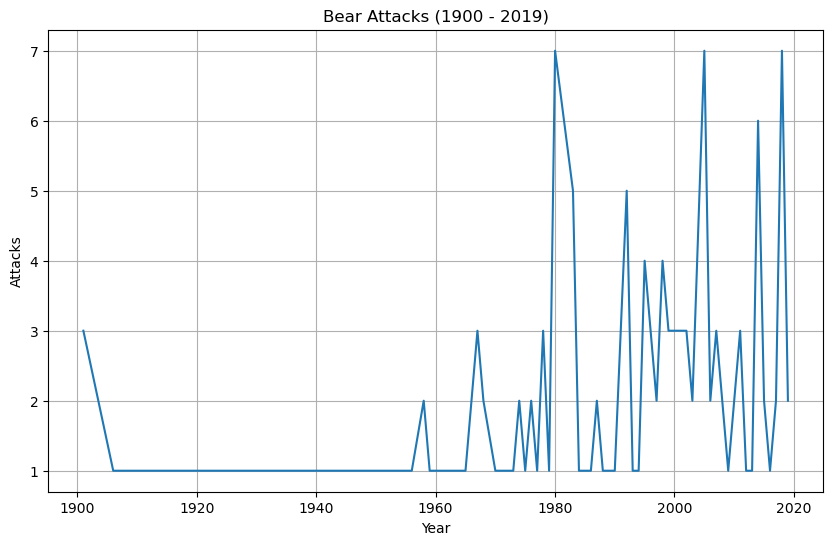

In [10]:
plt.figure(figsize = (10,6))
bear_attacks_count.plot(title = 'Bear Attacks (1900 - 2019)', xlabel = 'Year', ylabel = 'Attacks')

plt.grid()

# Q2. What are the main spots for the Attacks?

## Sharks

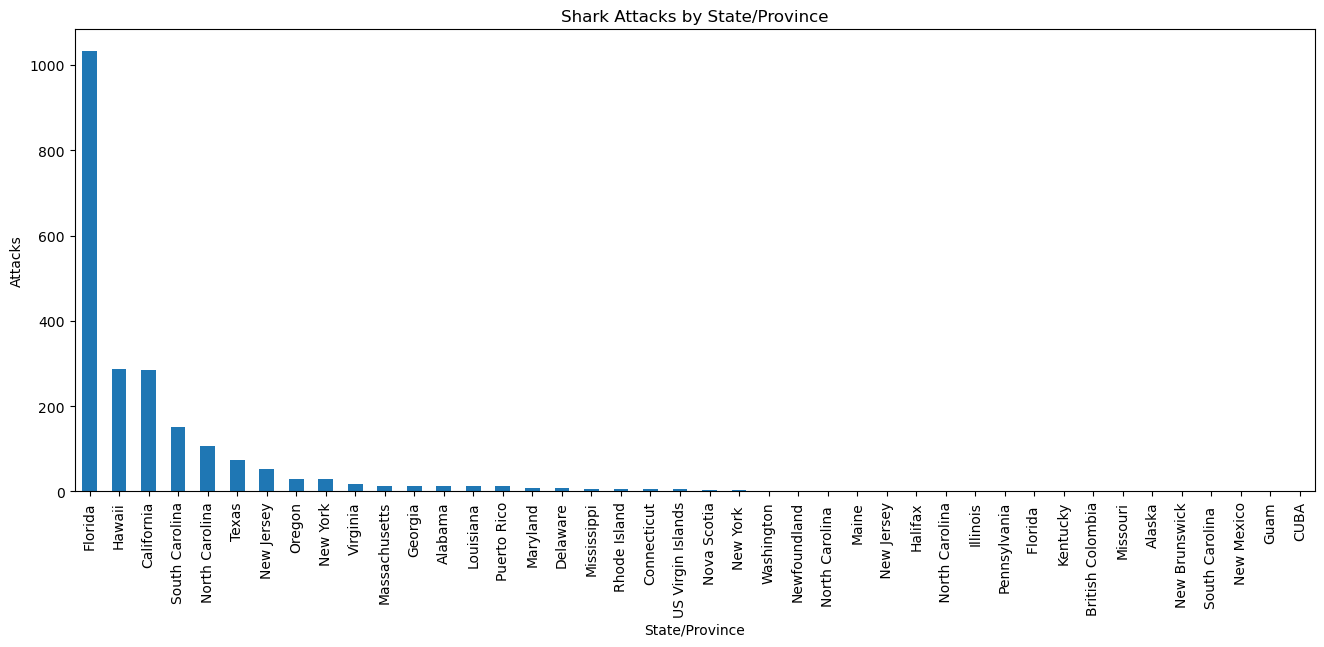

In [11]:
#country	area	location

shark_area_counts = shark_df['area'].value_counts()
plt.figure(figsize = (16,6))
shark_area_counts.plot(kind = 'bar', title = 'Shark Attacks by State/Province', xlabel = 'State/Province', ylabel = 'Attacks')
plt.show()


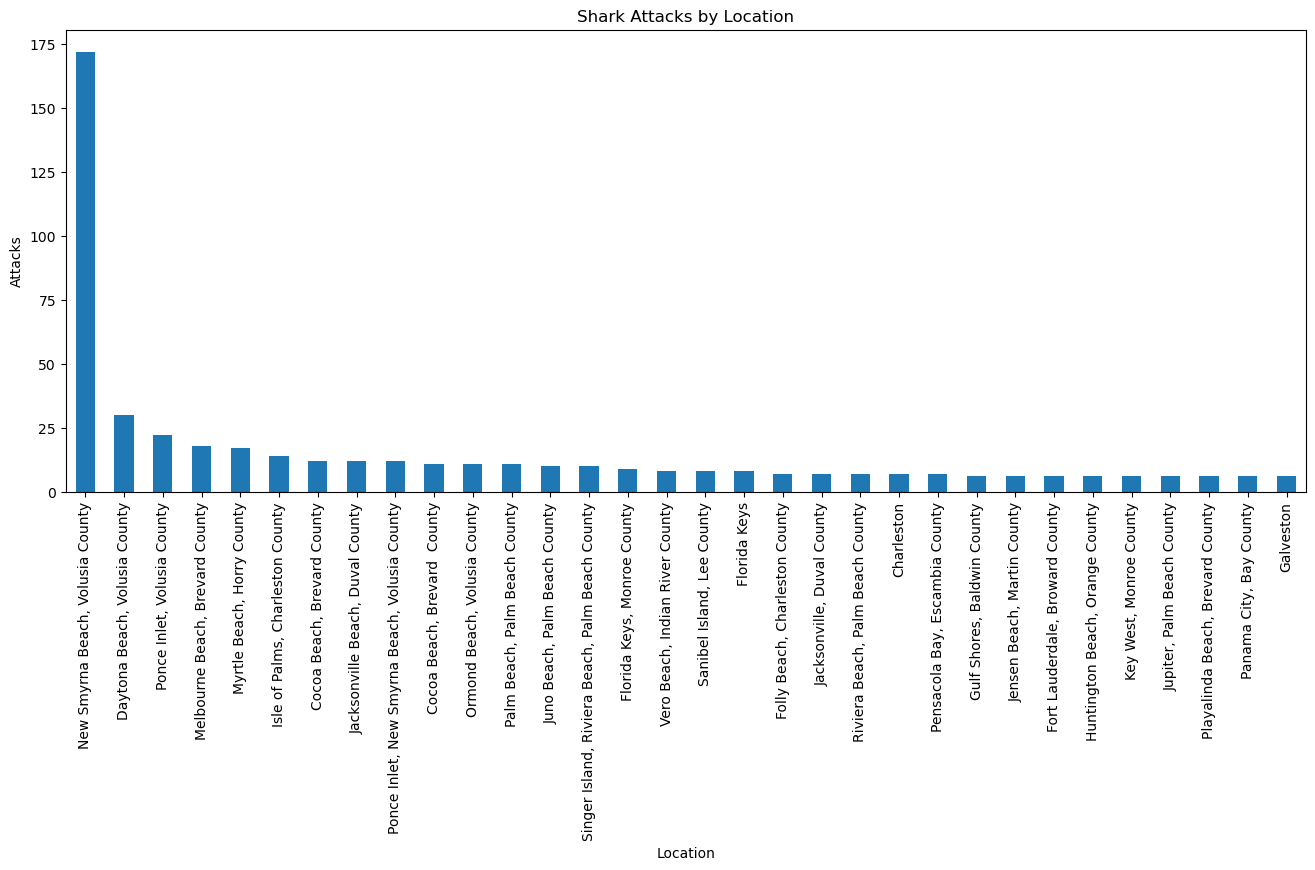

In [12]:
shark_location_counts = shark_df['location'].value_counts()

# shark_location_counts[shark_location_counts>5]
plt.figure(figsize = (16,6))
shark_location_counts[shark_location_counts>5].plot(kind = 'bar', title = 'Shark Attacks by Location', xlabel = 'Location', ylabel = 'Attacks')
plt.show()

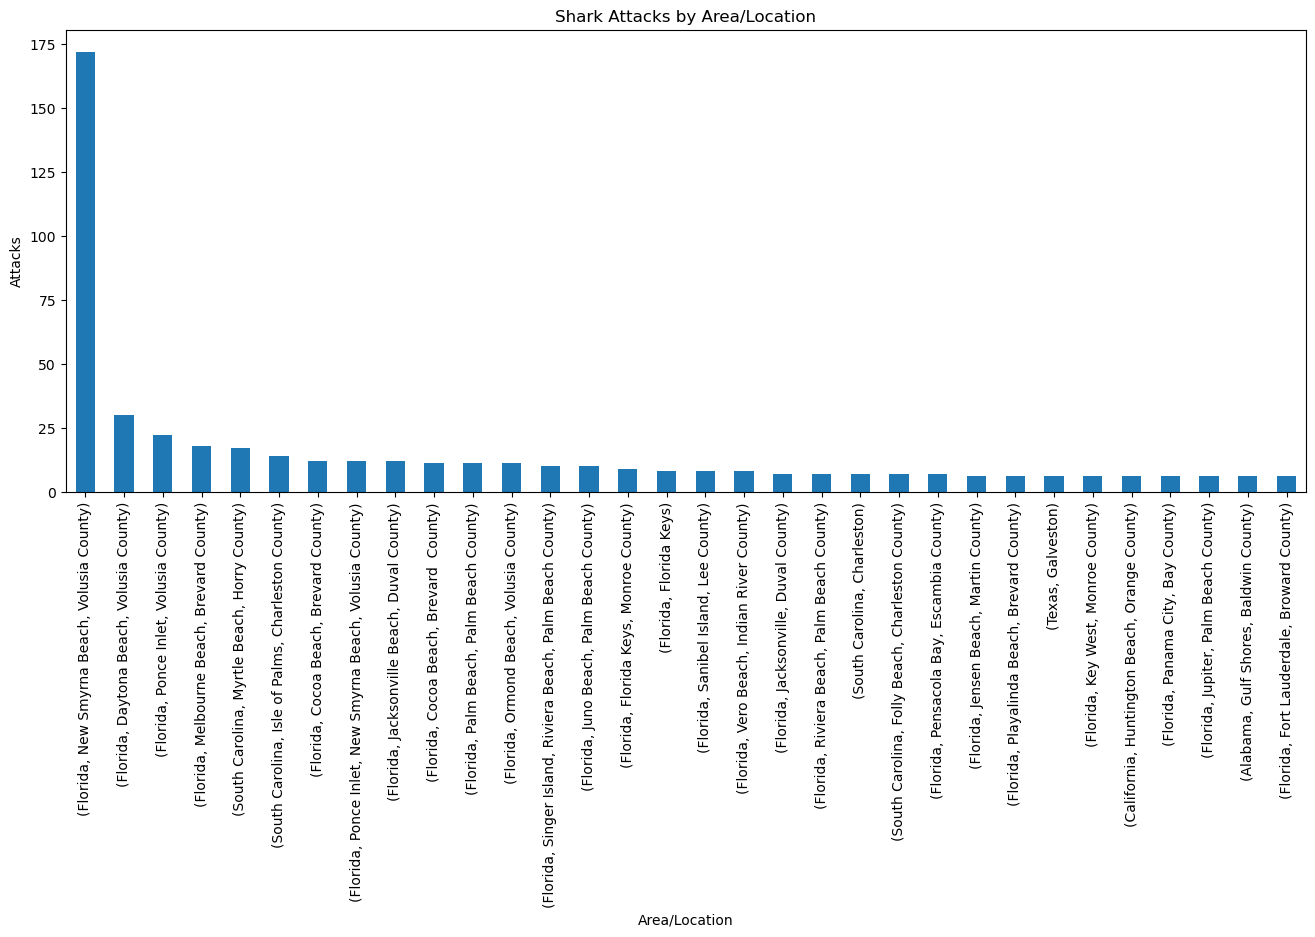

In [13]:
shark_area_location_counts = shark_df[['area', 'location']].value_counts()

plt.figure(figsize = (16,6))
shark_area_location_counts[shark_area_location_counts>5].plot(kind = 'bar', title = 'Shark Attacks by Area/Location', xlabel = 'Area/Location', ylabel = 'Attacks')
plt.show()



## Bears

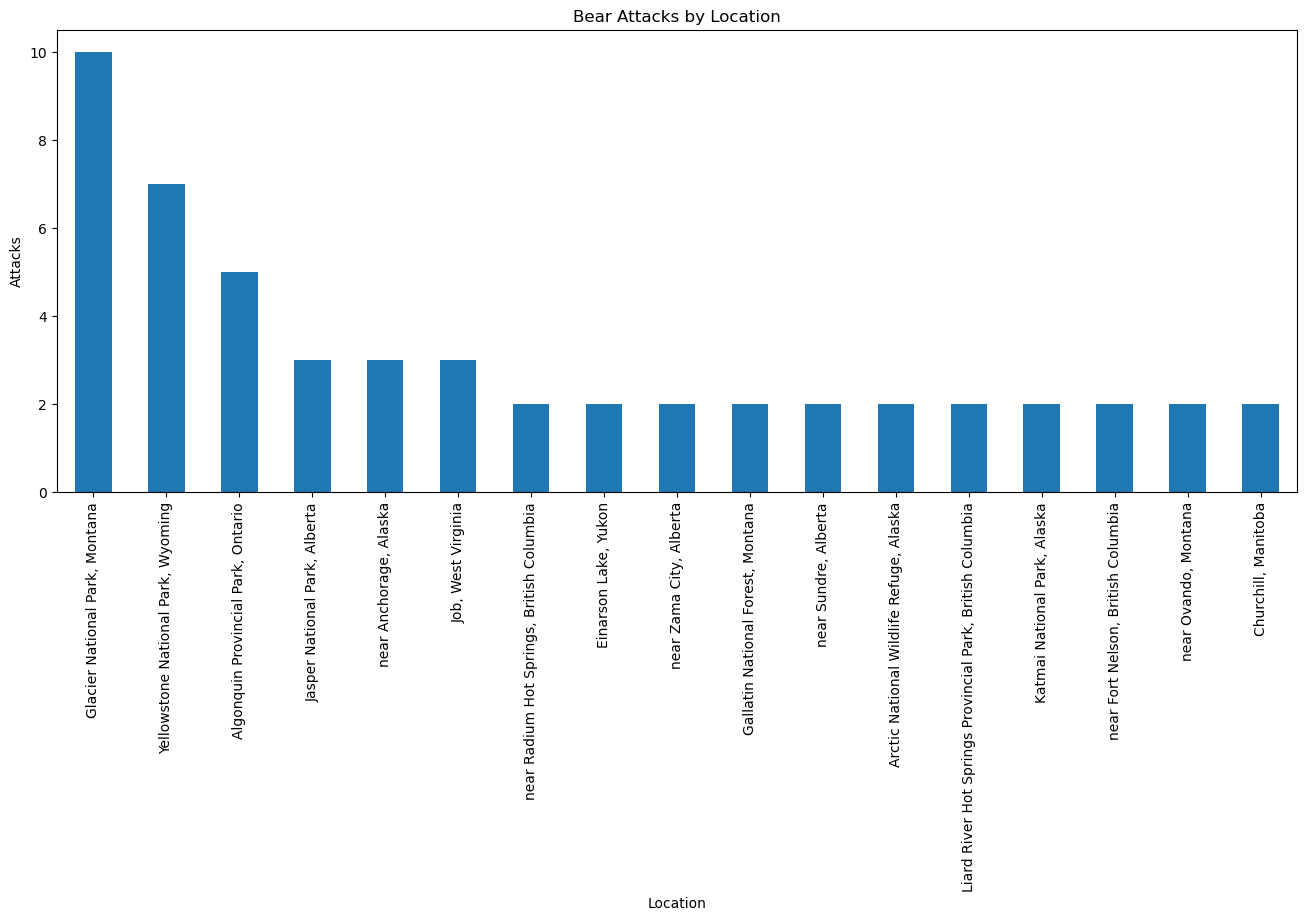

In [14]:
bear_location_counts = bear_df['location'].value_counts()


plt.figure(figsize = (16,6))
bear_location_counts[bear_location_counts>1].plot(kind = 'bar', title = 'Bear Attacks by Location', xlabel = 'Location', ylabel = 'Attacks')
plt.show()

In [15]:
#https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dv_project3")
location = geolocator.geocode("Panorama Mountain Resort, British Columbia")
print(location.address)

ModuleNotFoundError: No module named 'geopy'

In [ ]:
print((location.latitude, location.longitude))

(50.441951149999994, -116.21242469895196)


# Q3. Map out where the most attacks happened?

In [ ]:
# Q4. Who are the typical victims in these attacks?

# What activity was the victim doing when they got attacked?

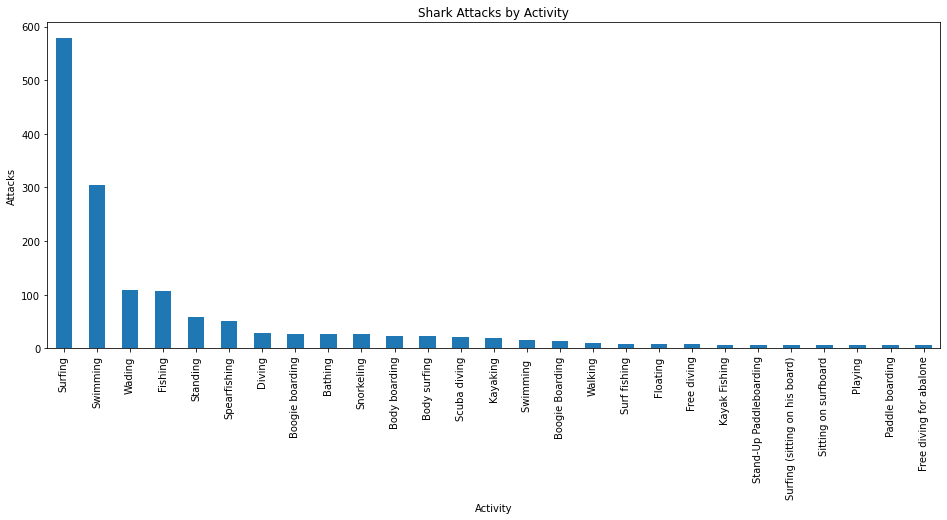

In [ ]:

shark_activites = shark_df['activity'].value_counts()


plt.figure(figsize = (16,6))
shark_activites[shark_activites>5].plot(kind = 'bar', title = 'Shark Attacks by Activity', xlabel = 'Activity', ylabel = 'Attacks')
plt.show()



# Type of Injury?

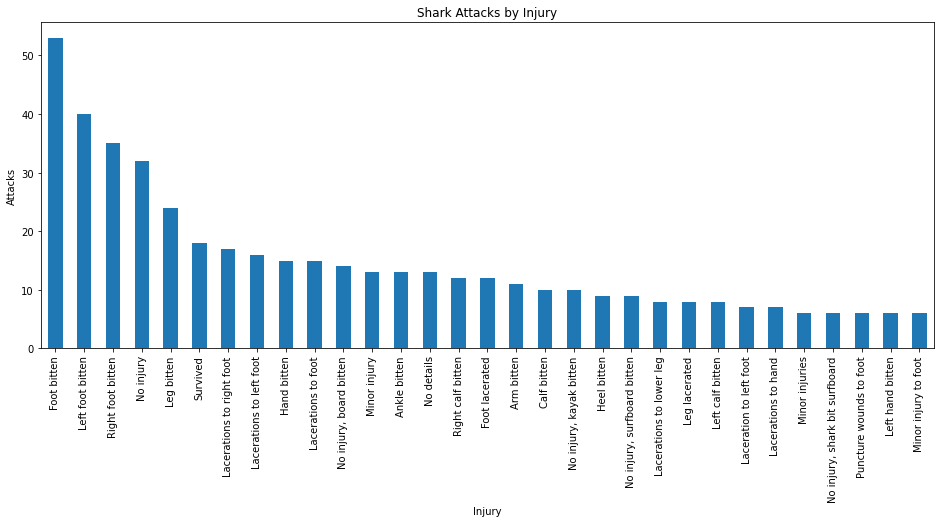

In [ ]:
# What was the most common injury?

shark_injuries = shark_df['injury'].value_counts()


plt.figure(figsize = (16,6))
shark_injuries[(shark_injuries< 80) & (shark_injuries>5)].plot(kind = 'bar', title = 'Shark Attacks by Injury', xlabel = 'Injury', ylabel = 'Attacks')
plt.show()

# Bear Species?

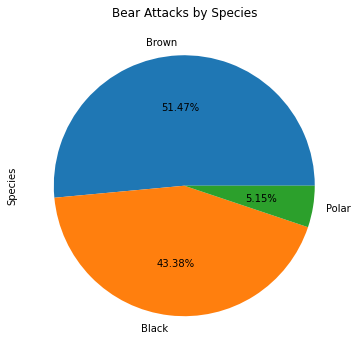

In [ ]:
bear_species = bear_df['species'].value_counts()


plt.figure(figsize = (16,6))
bear_species.plot(kind = 'pie', title = 'Bear Attacks by Species', ylabel = 'Species',autopct='%.2f%%')
plt.show()

# Q5. Checkout the age and gender of the victims to discover any patterns?

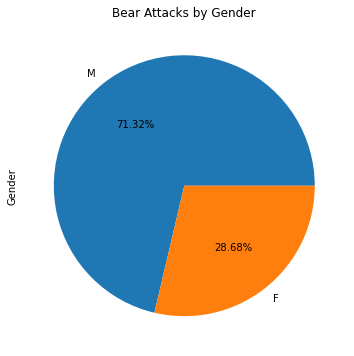

In [ ]:
bear_attacks_gender = bear_df['sex'].value_counts()


plt.figure(figsize = (16,6))
bear_attacks_gender.plot(kind = 'pie', title = 'Bear Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()

In [82]:
shark_attacks_gender = shark_df['sex'].value_counts()


plt.figure(figsize = (16,6))
shark_attacks_gender.plot(kind = 'pie', title = 'Bear Attacks by Gender', ylabel = 'Gender',autopct='%.2f%%')
plt.show()

NameError: name 'shark_df' is not defined

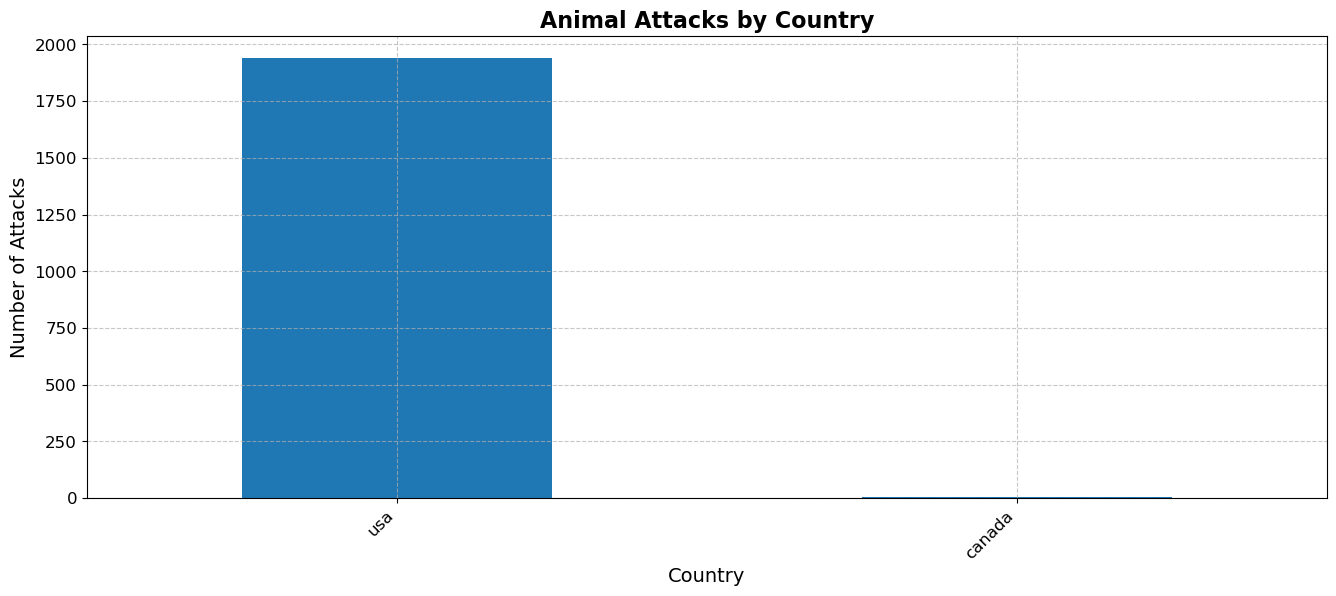

In [74]:
# Calculate the number of attacks per country
country_attacks = df['country'].value_counts()

# Define a bold color for the bars
bold_color = '#1f77b4'  # Strong blue color

# Create the bar chart
plt.figure(figsize=(16,6))
country_attacks.plot(kind='bar', color=bold_color)

# Customize the plot with bold and readable text
plt.title('Animal Attacks by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


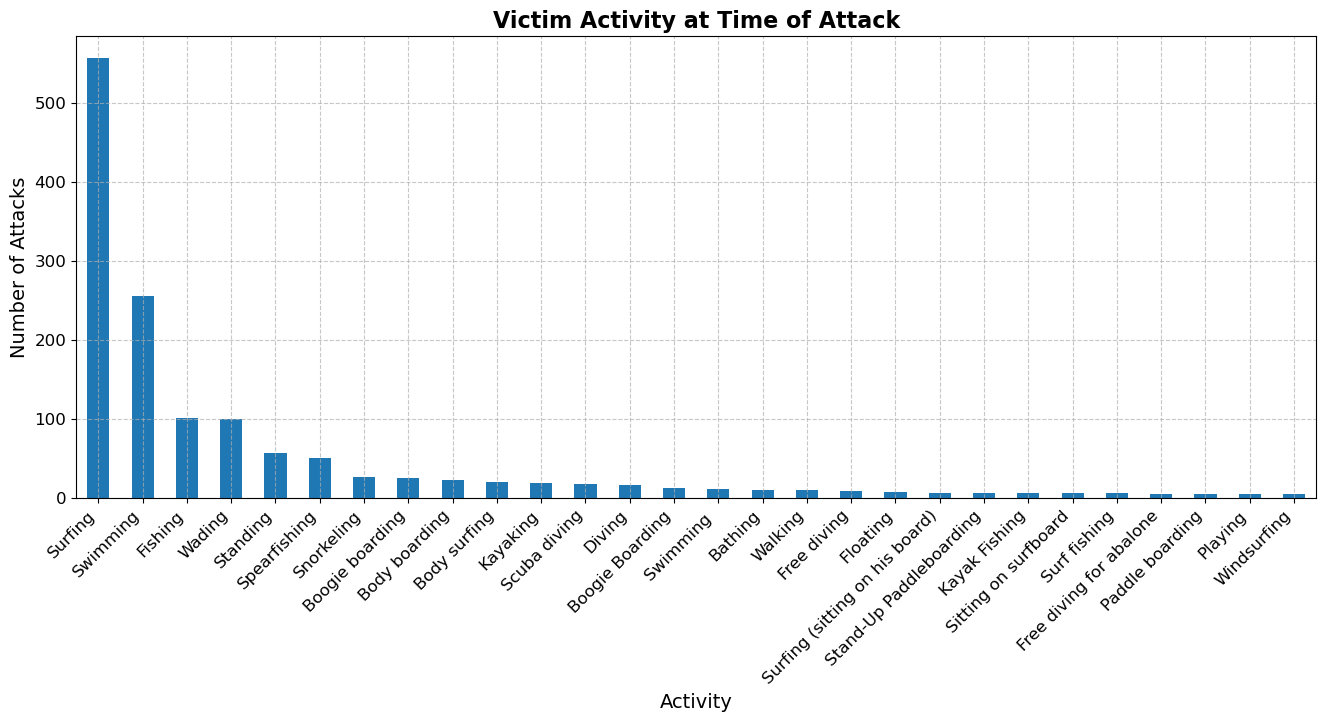

In [73]:
# Calculate the activity counts
activity_counts = df['activity'].value_counts()

# Define a bold color for the bars
bold_color = '#1f77b4'  # Strong blue color

# Filter activities with more than 5 occurrences
filtered_activity_counts = activity_counts[activity_counts > 5]

# Create the bar chart
plt.figure(figsize=(16,6))
filtered_activity_counts.plot(kind='bar', color=bold_color)

# Customize the plot with bold and readable text
plt.title('Victim Activity at Time of Attack', fontsize=16, fontweight='bold')
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


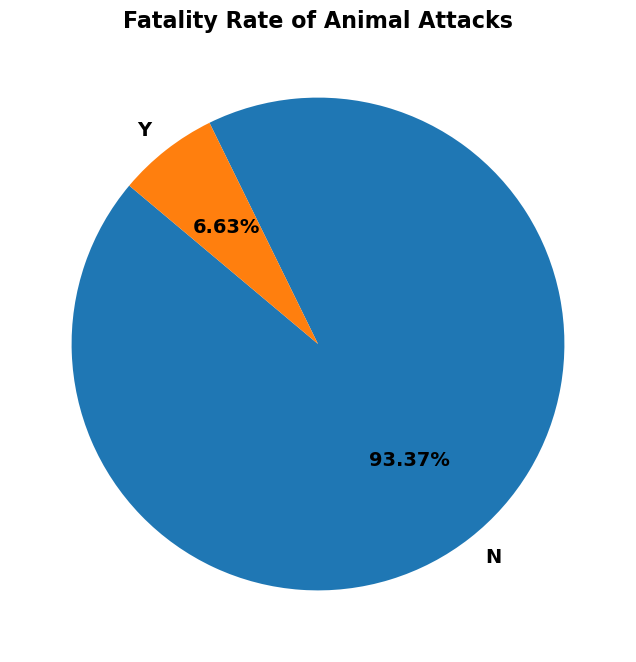

In [72]:
# Calculate the fatality rate counts
fatality_rate = df['fatal_(y/n)'].value_counts()

# Define bold colors for the pie chart
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange for a simple, bold contrast

# Create the pie chart
plt.figure(figsize=(8,8))
fatality_rate.plot(kind='pie', colors=colors, autopct='%.2f%%', startangle=140, textprops={'fontsize': 14, 'weight': 'bold'})

# Add a title with bold formatting and remove the y-label for a cleaner look
plt.title('Fatality Rate of Animal Attacks', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the y-label

plt.show()


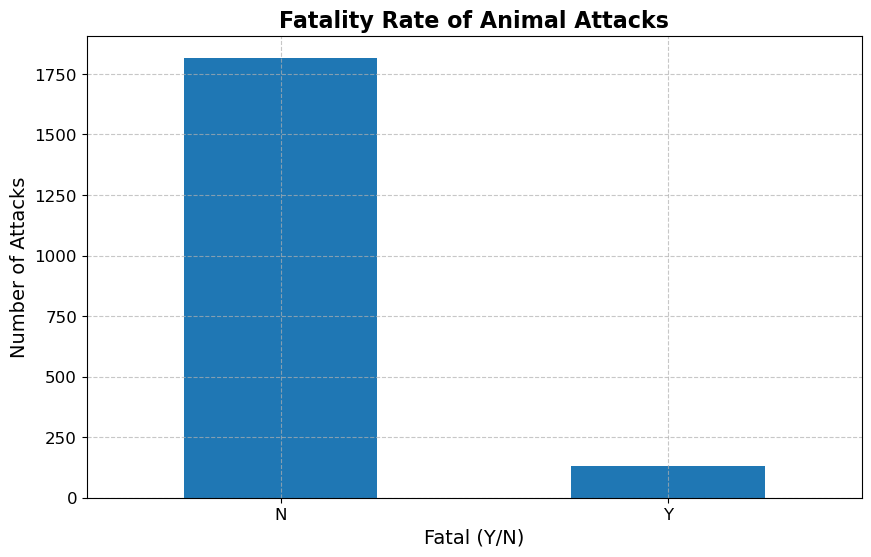

In [71]:
# Calculate the fatality rate counts
fatality_rate = df['fatal_(y/n)'].value_counts()

# Define a bold color
bold_color = '#1f77b4'  # Strong blue color

# Create the bar chart
plt.figure(figsize=(10,6))
fatality_rate.plot(kind='bar', color=bold_color)

# Customize the plot with bold and readable text
plt.title('Fatality Rate of Animal Attacks', fontsize=16, fontweight='bold')
plt.xlabel('Fatal (Y/N)', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Keep x-axis labels horizontal and bold
plt.yticks(fontsize=12)  # Make y-axis labels bold
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


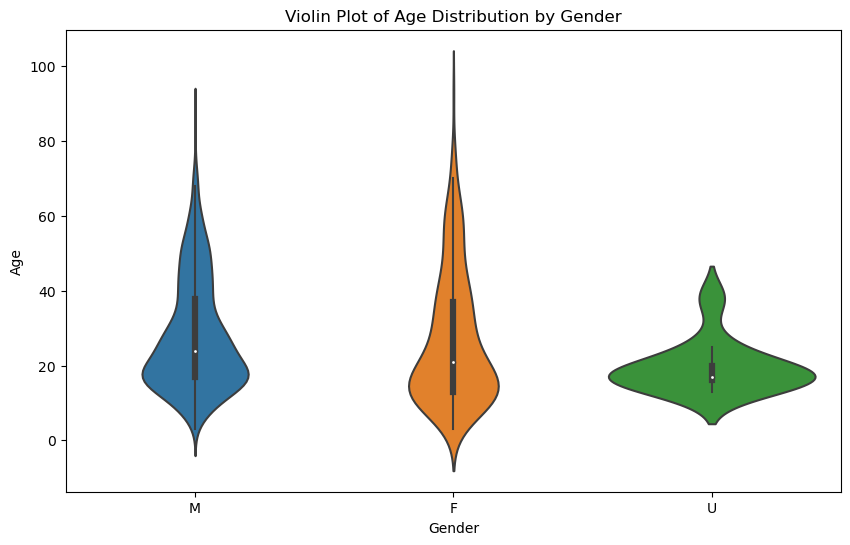

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(x='sex', y='age', data=df.dropna(subset=['age', 'sex']))
plt.title('Violin Plot of Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


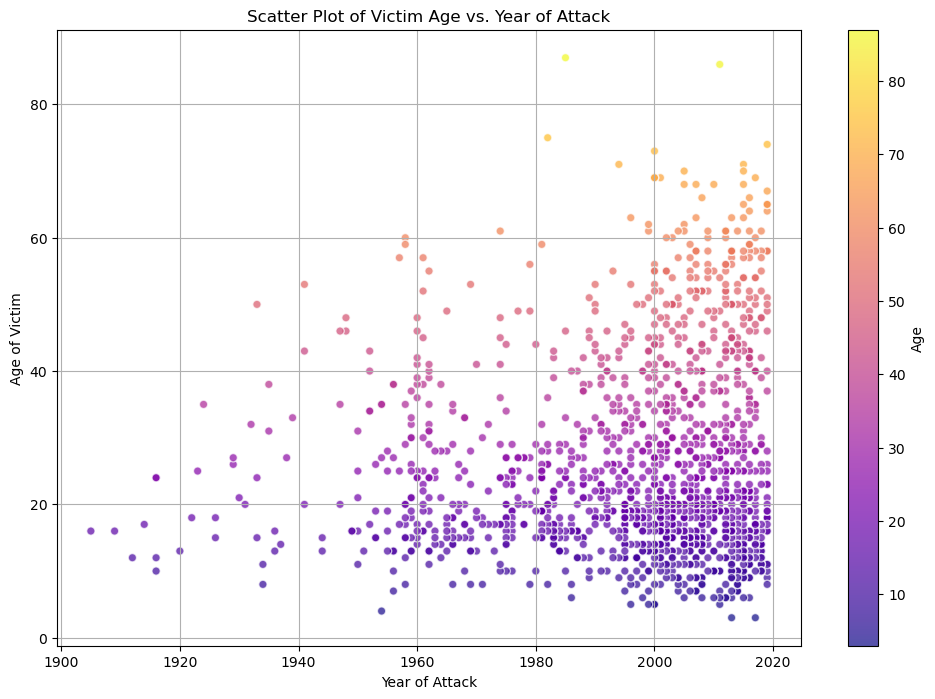

In [18]:
# Filter out rows where age or year is missing
filtered_df = df.dropna(subset=['age', 'year']).copy()

# Convert age to numeric using .loc to avoid the warning
filtered_df.loc[:, 'age'] = pd.to_numeric(filtered_df['age'], errors='coerce')

# Drop any remaining rows with NaN values in age
filtered_df = filtered_df.dropna(subset=['age'])

# Create the scatter plot with a color scheme
plt.figure(figsize=(12,8))
scatter = plt.scatter(filtered_df['year'], filtered_df['age'], c=filtered_df['age'], cmap='plasma', alpha=0.7, edgecolors='w', linewidth=1)

plt.title('Scatter Plot of Victim Age vs. Year of Attack')
plt.xlabel('Year of Attack')
plt.ylabel('Age of Victim')
plt.grid(True)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

plt.show()


In [13]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('combined_attacks_data.csv')

# Check the first few rows of the DataFrame to ensure it loaded correctly
print(df.head())

# Get summary information about the DataFrame
print(df.info())


  case_number        date    year attack_type country     area  \
0  2019.08.27  2019-08-27  2019.0    Provoked     USA  Florida   
1  2019.08.21  2019-08-21  2019.0  Unprovoked     USA  Florida   
2  2019.08.20  2019-08-20  2019.0  Unprovoked     USA   Hawaii   
3  2019.08.16  2019-08-16  2019.0  Unprovoked     USA  Florida   
4  2019.08.11  2019-08-11  2019.0  Unprovoked     USA   Hawaii   

                                          location  activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 name sex  ...  case_number.2 original_order unnamed:_22  \
0        Donald Walsh   M  ...     2019.08.27         6452.0         NaN   
1  Christian Mariani    M  ...     2019.08.21         6451.0      

In [14]:
# Drop unnecessary columns that may not be relevant for analysis
df = df.drop(columns=['case_number.1', 'case_number.2', 'original_order', 'unnamed:_22', 'unnamed:_23', 'details', 'bear_species', 'latitude', 'longitude', 'month', 'day'])

# Optionally, drop rows with missing values in critical columns like 'year', 'attack_type', 'fatal_(y/n)', etc.
df = df.dropna(subset=['year', 'attack_type', 'fatal_(y/n)'])

# Convert 'year' to an integer type if needed
df['year'] = df['year'].astype(int)

# Check the cleaned dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 0 to 2129
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             1945 non-null   object 
 1   date                    1810 non-null   object 
 2   year                    1946 non-null   int32  
 3   attack_type             1946 non-null   object 
 4   country                 1946 non-null   object 
 5   area                    1946 non-null   object 
 6   location                1946 non-null   object 
 7   activity                1863 non-null   object 
 8   name                    1931 non-null   object 
 9   sex                     1946 non-null   object 
 10  age                     1406 non-null   float64
 11  injury                  1946 non-null   object 
 12  fatal_(y/n)             1946 non-null   object 
 13  time                    1343 non-null   object 
 14  species                 1144 non-null   objec

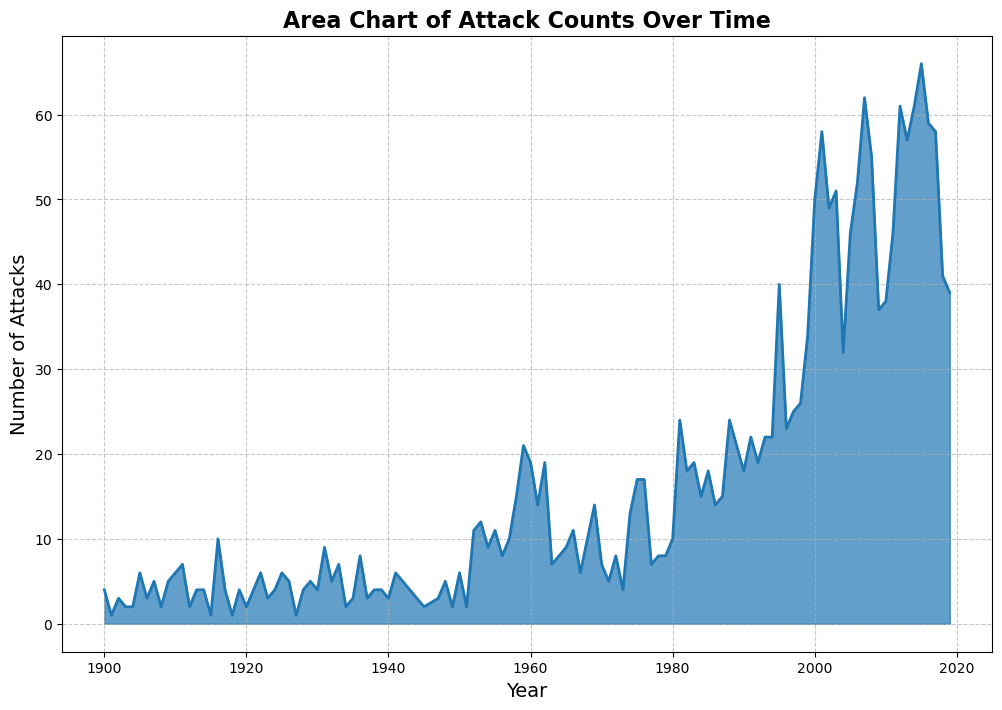

In [70]:
# Group data by year and count the number of attacks
attack_counts_by_year = df.groupby('year').size()

# Create an area chart with bold colors
plt.figure(figsize=(12,8))
plt.fill_between(attack_counts_by_year.index, attack_counts_by_year.values, color='#1f77b4', alpha=0.7)  # Bold blue color
plt.plot(attack_counts_by_year.index, attack_counts_by_year.values, color='#1f77b4', linewidth=2)

# Customize the plot with bold and readable text
plt.title('Area Chart of Attack Counts Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


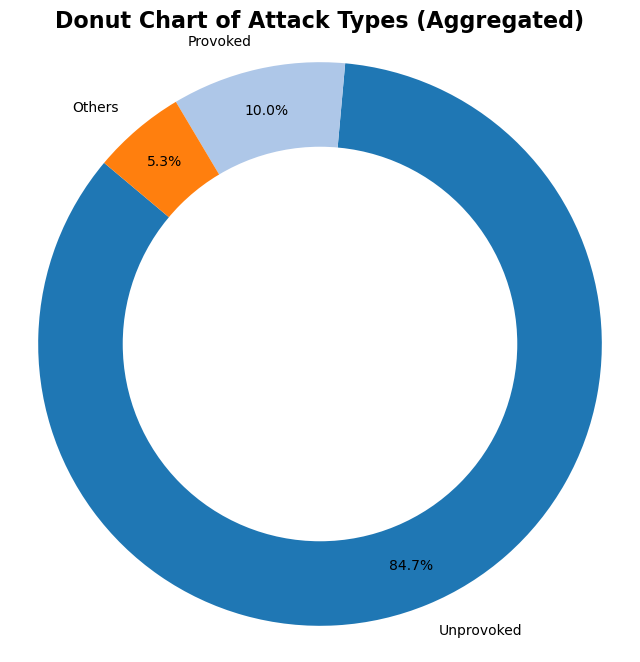

In [69]:
# Set a threshold for grouping smaller categories
threshold = 0.05  # Categories that are less than 5% of the total

# Calculate the proportions of each category
attack_type_proportions = attack_type_counts / attack_type_counts.sum()

# Identify categories to group under "Others"
small_categories = attack_type_proportions[attack_type_proportions < threshold].index

# Replace small categories with 'Others'
df['attack_type_aggregated'] = df['attack_type'].replace(small_categories, 'Others')

# Recalculate the counts for the aggregated categories
aggregated_counts = df['attack_type_aggregated'].value_counts()

# Define bold colors for the donut chart
colors = plt.cm.tab20.colors  # A bold color palette

# Create the donut chart with bold colors
plt.figure(figsize=(8,8))
plt.pie(aggregated_counts, labels=aggregated_counts.index, colors=colors, autopct='%.1f%%', startangle=140, pctdistance=0.85)

# Create a white circle in the middle to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title with bold formatting
plt.title('Donut Chart of Attack Types (Aggregated)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


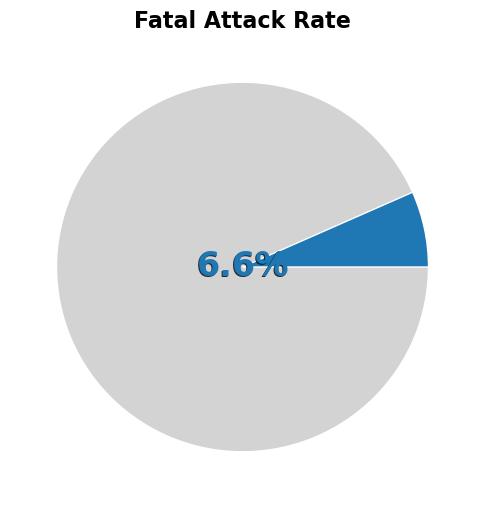

In [68]:
# Calculate the fatality rate
fatality_rate = df['fatal_(y/n)'].value_counts(normalize=True)['Y']

# Create the figure and axis for the gauge chart
fig, ax = plt.subplots(figsize=(6,6))

# Create the gauge chart with bold colors
wedge_bg = Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=360, facecolor='lightgray', edgecolor='w')
wedge = Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=fatality_rate*360, facecolor='#1f77b4', edgecolor='w')

ax.add_patch(wedge_bg)
ax.add_patch(wedge)

# Add the text for the percentage in the center of the gauge with a black outline
percent_text = f'{fatality_rate*100:.1f}%'

# Offsetting text slightly for the black outline effect
ax.text(0.5, 0.5, percent_text, horizontalalignment='center', verticalalignment='center', fontsize=24, fontweight='bold', color='black', alpha=0.8)
ax.text(0.5+0.002, 0.5+0.002, percent_text, horizontalalignment='center', verticalalignment='center', fontsize=24, fontweight='bold', color='#1f77b4')

# Remove the axes for a clean look
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Add a title with bold formatting
plt.title('Fatal Attack Rate', fontsize=16, fontweight='bold')
plt.show()


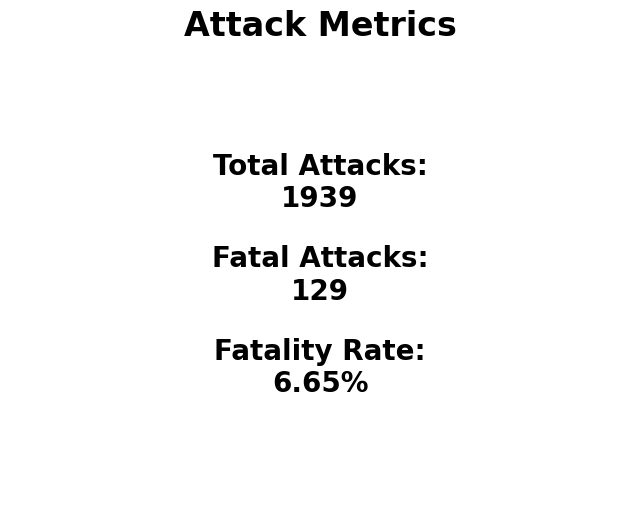

In [66]:
# Calculate metrics
total_attacks = df['case_number'].nunique()
fatal_attacks = df[df['fatal_(y/n)'] == 'Y']['case_number'].nunique()
fatality_rate = (fatal_attacks / total_attacks) * 100

# Create a figure to display the metrics
plt.figure(figsize=(8,6))
plt.text(0.5, 0.7, f'Total Attacks:\n{total_attacks}', fontsize=20, ha='center', va='center', weight='bold')
plt.text(0.5, 0.5, f'Fatal Attacks:\n{fatal_attacks}', fontsize=20, ha='center', va='center', weight='bold')
plt.text(0.5, 0.3, f'Fatality Rate:\n{fatality_rate:.2f}%', fontsize=20, ha='center', va='center', weight='bold')

plt.axis('off')  # Hide the axes
plt.title('Attack Metrics', fontsize=24, weight='bold')
plt.show()


<Figure size 1400x800 with 0 Axes>

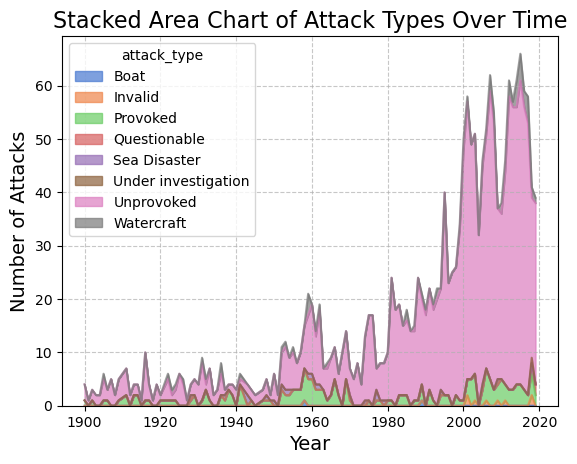

In [63]:
# Group by year and attack type, then unstack to prepare for plotting
attack_type_year_counts = df.groupby(['year', 'attack_type']).size().unstack()

# Define a clean color palette
colors = sns.color_palette('muted', n_colors=len(attack_type_year_counts.columns))

# Create a line and stacked area chart with bold colors
plt.figure(figsize=(14,8))
attack_type_year_counts.plot(kind='area', stacked=True, alpha=0.7, color=colors)

# Customize the plot with bold and readable text
plt.title('Stacked Area Chart of Attack Types Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


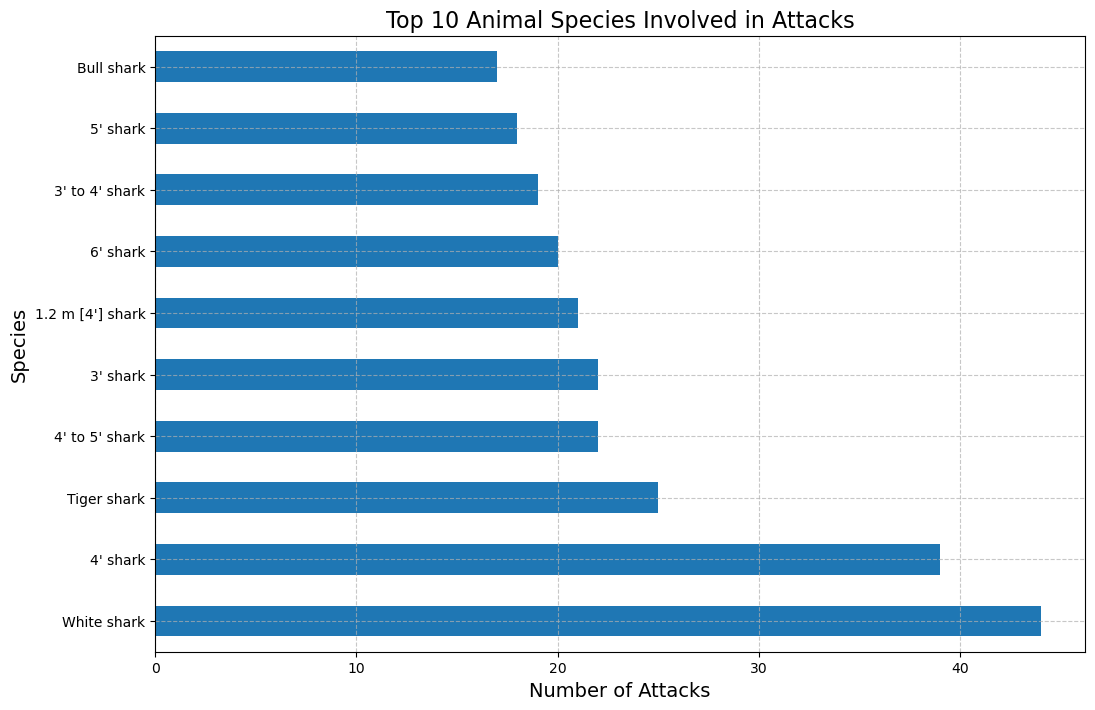

In [62]:
# Define a bold color
bold_color = '#1f77b4'  # A strong blue color

plt.figure(figsize=(12,8))
top_species_counts.plot(kind='barh', color=bold_color, title='Top 10 Animal Species Involved in Attacks', xlabel='Number of Attacks', ylabel='Species')

# Customize the font size for better readability
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Species', fontsize=14)
plt.title('Top 10 Animal Species Involved in Attacks', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


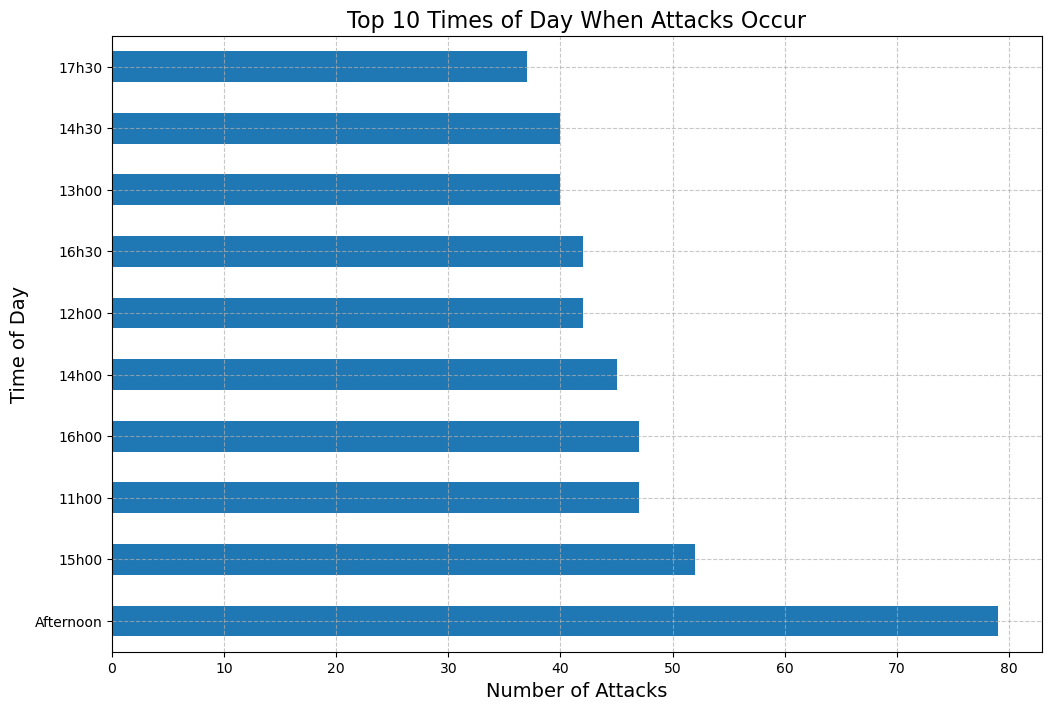

In [60]:
# Color
bold_color = '#1f77b4'  # A strong blue color

plt.figure(figsize=(12,8))
time_of_day_counts.plot(kind='barh', color=bold_color, title='Top 10 Times of Day When Attacks Occur', xlabel='Number of Attacks', ylabel='Time of Day')

# Optional: Customize the font size for better readability
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)
plt.title('Top 10 Times of Day When Attacks Occur', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


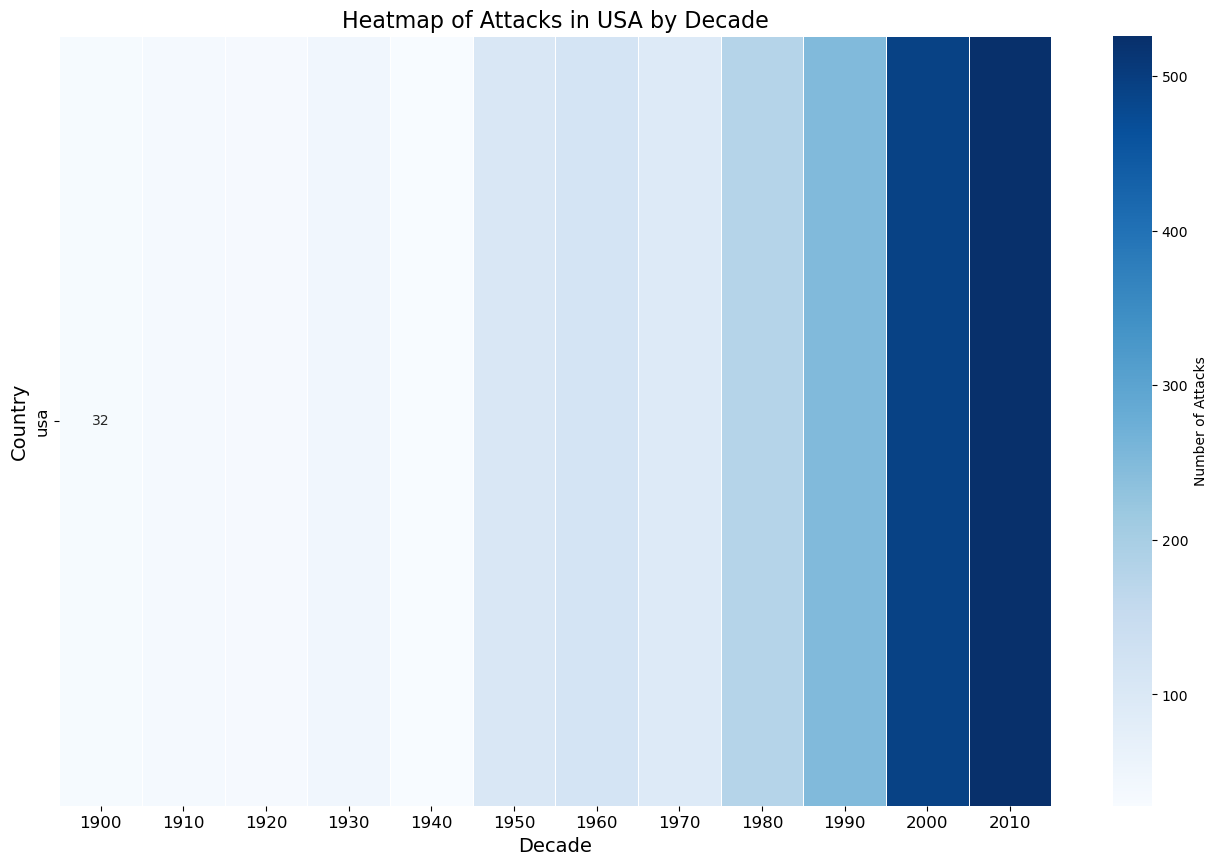

In [61]:
# Standardize the 'country' column to remove any leading/trailing spaces and make it lowercase
df['country'] = df['country'].str.strip().str.lower()

# Filter out Canada from the dataframe
df_filtered = df[df['country'] != 'canada'].copy()

# Create a new column for decade using .loc[]
df_filtered.loc[:, 'decade'] = (df_filtered['year'] // 10) * 10

# Create a pivot table for the heatmap
heatmap_data = df_filtered.pivot_table(index='country', columns='decade', values='case_number', aggfunc='count', fill_value=0)

# Create the heatmap with a clean and bold color palette
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, annot=True, fmt='d', cbar_kws={'label': 'Number of Attacks'})

plt.title('Heatmap of Attacks in USA by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [ ]:
# Color
bold_color = '#1f77b4'  # A strong blue color

plt.figure(figsize=(12,8))
time_of_day_counts.plot(kind='barh', color=bold_color, title='Top 10 Times of Day When Attacks Occur', xlabel='Number of Attacks', ylabel='Time of Day')

# Optional: Customize the font size for better readability
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)
plt.title('Top 10 Times of Day When Attacks Occur', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
